                                         Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics
import seaborn as sns

In [3]:
# Check particular Transaction is fraud or not

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
 # Check any missing value in data set

data.isna().any()


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
# Manual Checking for any null values
null_column=pd.DataFrame({'Columns':data.isna().sum().index,'No Null values':data.isna().sum().values,'Percentage':data.isna().sum().values/data.shape[0]})

In [11]:
null_column

,Columns,No Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [12]:
data['Class'].tail() 

284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [13]:
 # Percentage of total no of fraud transaction

nfcount=0
notFraud=data['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfcount=nfcount+1

nfcount

# percentage
per_nef=(nfcount/len(notFraud))*100
print(f'Percentage of total not fraud transactions in the data: {round(per_nef, 2)}%')


Percentage of total not fraud transactions in the data: 99.83%


In [14]:
# Percentage of total fraud
Fraud=data['Class']
fcount=(data['Class']==1).sum()
pre_nf=(fcount/len(data['Class']))*100

print(f'Percentage of total fraud transactions in the data: {round(pre_nf, 2)}%')

Percentage of total fraud transactions in the data: 0.17%


In [15]:
# Count Fraud and Genuine Transactions
fraud_count = (data['Class'] == 1).sum()
genuine_count = (data['Class'] == 0).sum()

# Create DataFrame for Plotting
plot_data = pd.DataFrame({
    'Transaction Type': ['Fraud', 'Genuine'],
    'Count': [fraud_count, genuine_count]
})

plot_data


,Transaction Type,Count
0,Fraud,492
1,Genuine,284315


C:\Users\subahu sancheti\AppData\Local\Temp\ipykernel_13836\2559207443.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transaction Type', y='Count', data=plot_data, palette='Blues', edgecolor='black')


<Axes: title={'center': 'Fraud vs Genuine Transaction'}, xlabel='Transaction Type', ylabel='Count'>

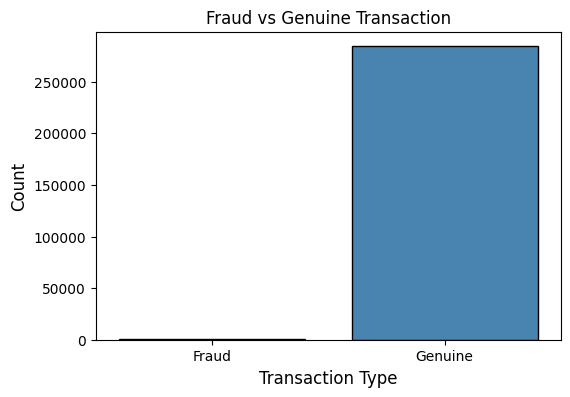

In [16]:
# Bar Plot

plt.figure(figsize=(6, 4))
plt.title('Fraud vs Genuine Transaction')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

sns.barplot(x='Transaction Type', y='Count', data=plot_data, palette='Blues', edgecolor='black')

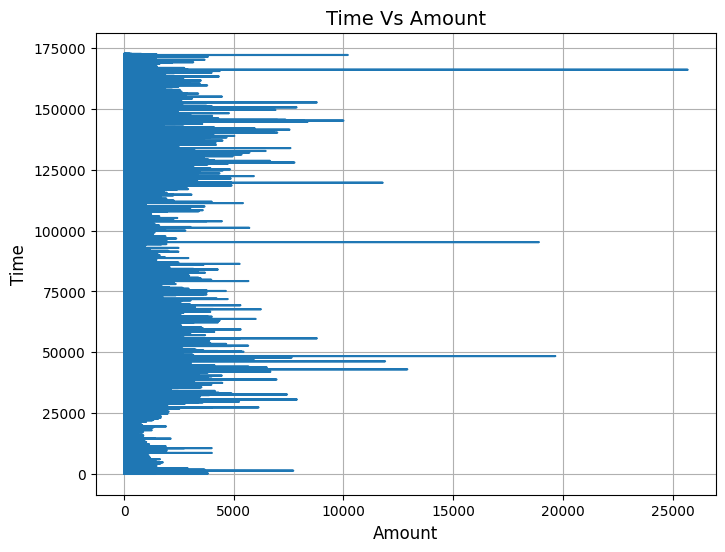

In [23]:
# plot relationship between time and amount
x=data['Amount']
y=data['Time']
plt.figure(figsize=(8, 6)) 
plt.plot(x,y)
plt.title('Time Vs Amount',fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\subahu sancheti\AppData\Local\Temp\ipykernel_13836\1384822905.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'], color='red')


<Axes: title={'center': 'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

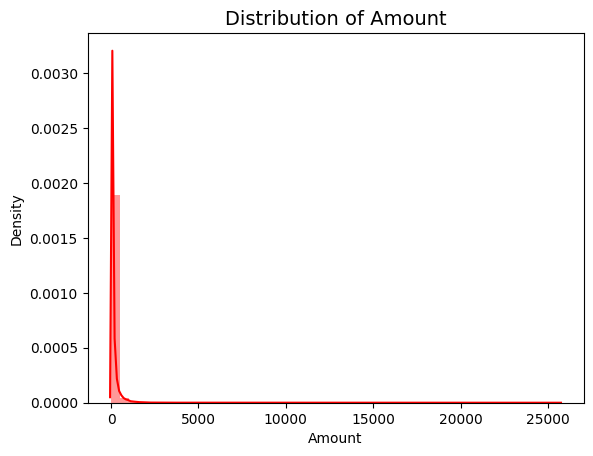

In [ ]:
# Distribution of Amount

plt.Figure(figsize=(10,8))
plt.title('Distribution of Amount', fontsize=14)
sns.distplot(data['Amount'], color='red')



From This amount distribution curve it show high amount transaction is very low. so there is high probability for huge transactions to be fraud. 

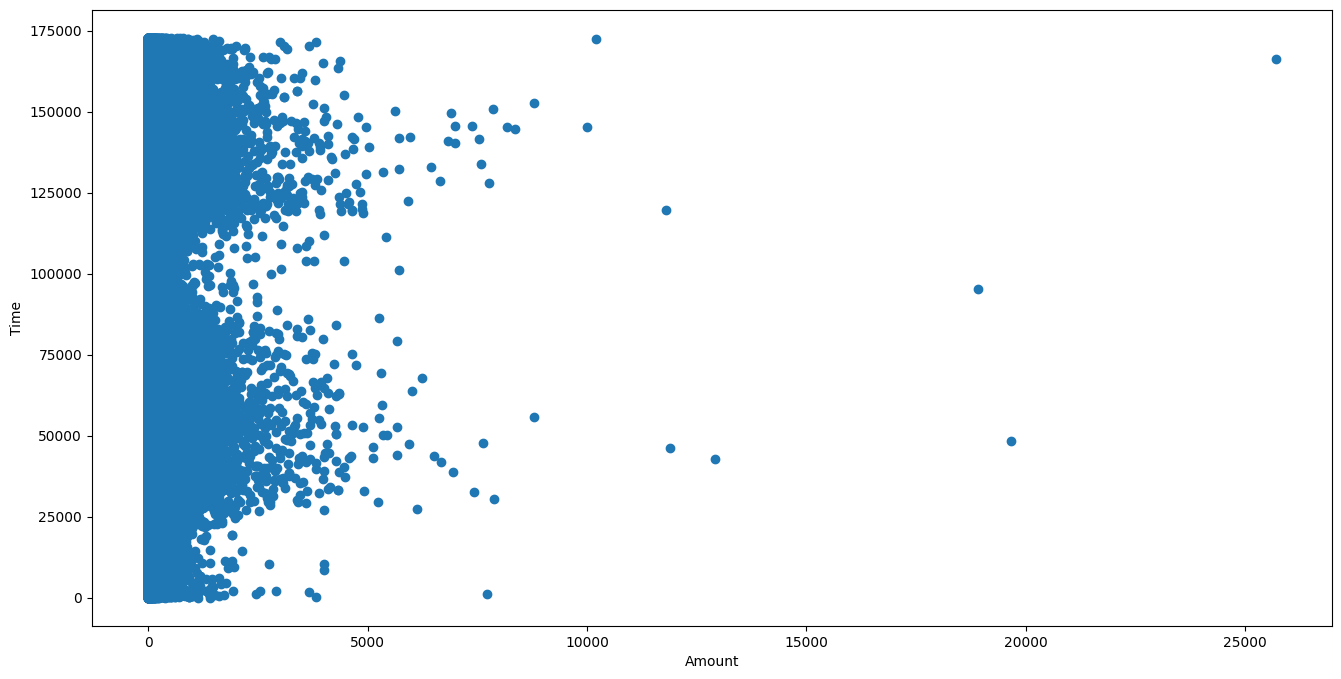

In [ ]:
# Outliers
plt.figure(figsize=(16,8))
ax = plt.gca() # get current axis

ax.scatter(data['Amount'],data['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()


Outliers in case chance that  high amount  transaction is  fraud

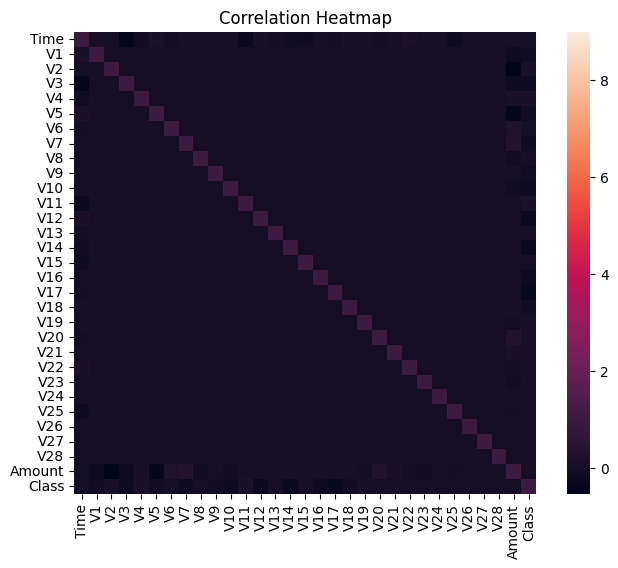

In [50]:
# Correlation matrix 
correlation_metrics=data.corr()
fig=plt.figure(figsize=(8,6))  # Adjust figure size

# heatmap
sns.heatmap(correlation_metrics,vmax=9,square=True)

plt.title("Correlation Heatmap")
plt.show()

Correlation metrics help us to understand the core relation between two attribute 

In [55]:
# to  start modeling split the data set
# train 80 %
# test  20 %

x=data.drop('Class',axis=1)
x.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [56]:
y=data['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [58]:
LogisticReg=LogisticRegression()
LogisticReg.fit(xtrain,ytrain)

c:\Users\subahu sancheti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred=LogisticReg.predict(xtest)

In [64]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(56962,))

In [72]:
accuracy=LogisticReg.score(xtest,ytest)

Accuracy is 99.85%

In [ ]:
# Confusion Matrix

Positive (P) : Observation is positive (for example: The transaction genuine).
- Negative (N) : Observation is not positive (for example: The transaction is not genuine).
- True Positive (TP): Observation is positive, and is predicted to be positive.
- False Negative (FN) : Observation is positive, but is predicted negative.
- True Negative (TN) : Observation is negative, and is predicted to be negative.
- False Positive (FP) : Observation is negative, but is predicted positive.

Accuracy =  tp+tn
           ---------
          tp+tn+fp+fn

In [66]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[56829    35]
 [   41    57]]


In [74]:
# Accuracy Calculation

print('Accuracy score of the logistic regression model:',round(accuracy*100,2),'%')

Accuracy score of the logistic regression model: 99.87 %
